## Group Members
* 150874 Ivy Orimba
* 152244 Margret Kyalo
* 150876 Abigael Kinya
* 151373 Mutua Ryan
* 150500 Elvis Muchiri
* 150145 Scott Amisi


## Import libraries

In [1]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import numpy as np

## Reading the dataset (Stars.csv)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Stars.csv to Stars.csv


In [3]:
df = pd.read_csv('Stars.csv')

## Understanding the Dataset

In [ ]:
df.head() # display first 5 rows

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,0,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,0,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,0,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,0,Brown Dwarf,Red,M


In [ ]:
df.tail() # display last 5 rows

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
235,38940,374830.0,1356.0,-9.93,5,Hypergiant,Blue,O
236,30839,834042.0,1194.0,-10.63,5,Hypergiant,Blue,O
237,8829,537493.0,1423.0,-10.73,5,Hypergiant,White,A
238,9235,404940.0,1112.0,-11.23,5,Hypergiant,White,A
239,37882,294903.0,1783.0,-7.80,5,Hypergiant,Blue,O


In [ ]:
df.shape # no of records and columns

(240, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (K)          240 non-null    int64  
 1   Luminosity (L/Lo)        240 non-null    float64
 2   Radius (R/Ro)            240 non-null    float64
 3   Absolute magnitude (Mv)  240 non-null    float64
 4   Star type                240 non-null    int64  
 5   Star category            240 non-null    object 
 6   Star color               240 non-null    object 
 7   Spectral Class           240 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 15.1+ KB


In [ ]:
df.nunique()

,0
Temperature (K),228
Luminosity (L/Lo),208
Radius (R/Ro),216
Absolute magnitude (Mv),228
Star type,6
Star category,6
Star color,19
Spectral Class,7


In [ ]:
df.isnull().sum()

,0
Temperature (K),0
Luminosity (L/Lo),0
Radius (R/Ro),0
Absolute magnitude (Mv),0
Star type,0
Star category,0
Star color,0
Spectral Class,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [ ]:
df.columns

Index(['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)',
       'Absolute magnitude (Mv)', 'Star type', 'Star category', 'Star color',
       'Spectral Class'],
      dtype='object')

## Conclusion from Understanding the DataSet

1.   The dataset has 240 records with 8 columns

2.   Star Type has relatively fewer unique values we can use this as the target varaible

3.   The dataset includes
* numerical columns (e.g., Temperature (K), Luminosity (L/Lo), Radius (R/Ro), Absolute Magnitude (Mv)) that are continuous
* categorical columns (e.g., Star Type, Star Category, Star Color, Spectral Class)

4. No missing Values

5. No duplicates





# Exploratory Analysis




In [ ]:
features_continuos = ['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)', 'Absolute magnitude (Mv)']
features_categories = ['Spectral Class', 'Star category', 'Star color']
target_variable = ['Star type']

## Target Variable exploratory analysis

<ipython-input-39-ff230634ebbe>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Star type", data=df, ax=axes, palette="pastel")


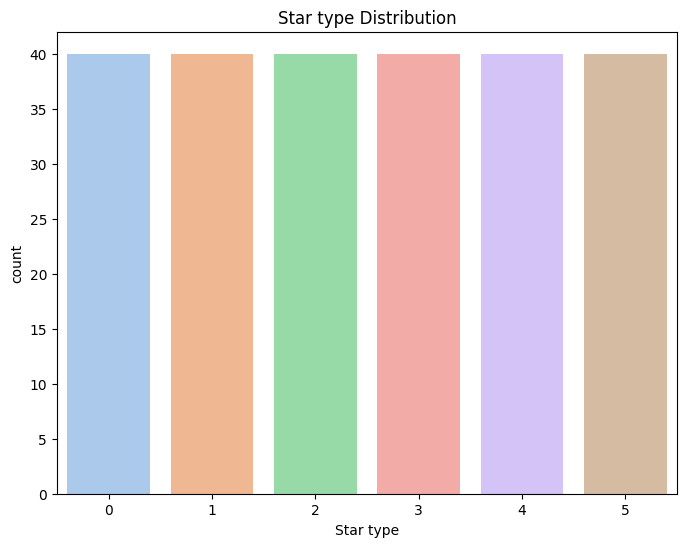

In [ ]:
# Star type distribution

fig, axes = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(x="Star type", data=df, ax=axes, palette="pastel")
axes.set_title("Star type Distribution")

plt.show()

In [ ]:
df['Star type'].value_counts()

,count
Star type,
0,40
1,40
2,40
3,40
4,40
5,40


Great! The target variable is balanced

## Features Categorical Exploratory Analysis

<ipython-input-16-a573a9e90dba>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Spectral Class", data=df, ax=axes[0, 0], palette="pastel")
<ipython-input-16-a573a9e90dba>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Star category", data=df, ax=axes[0, 1], palette="muted")
<ipython-input-16-a573a9e90dba>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Star color", data=df, ax=axes[1, 0], palette="muted")


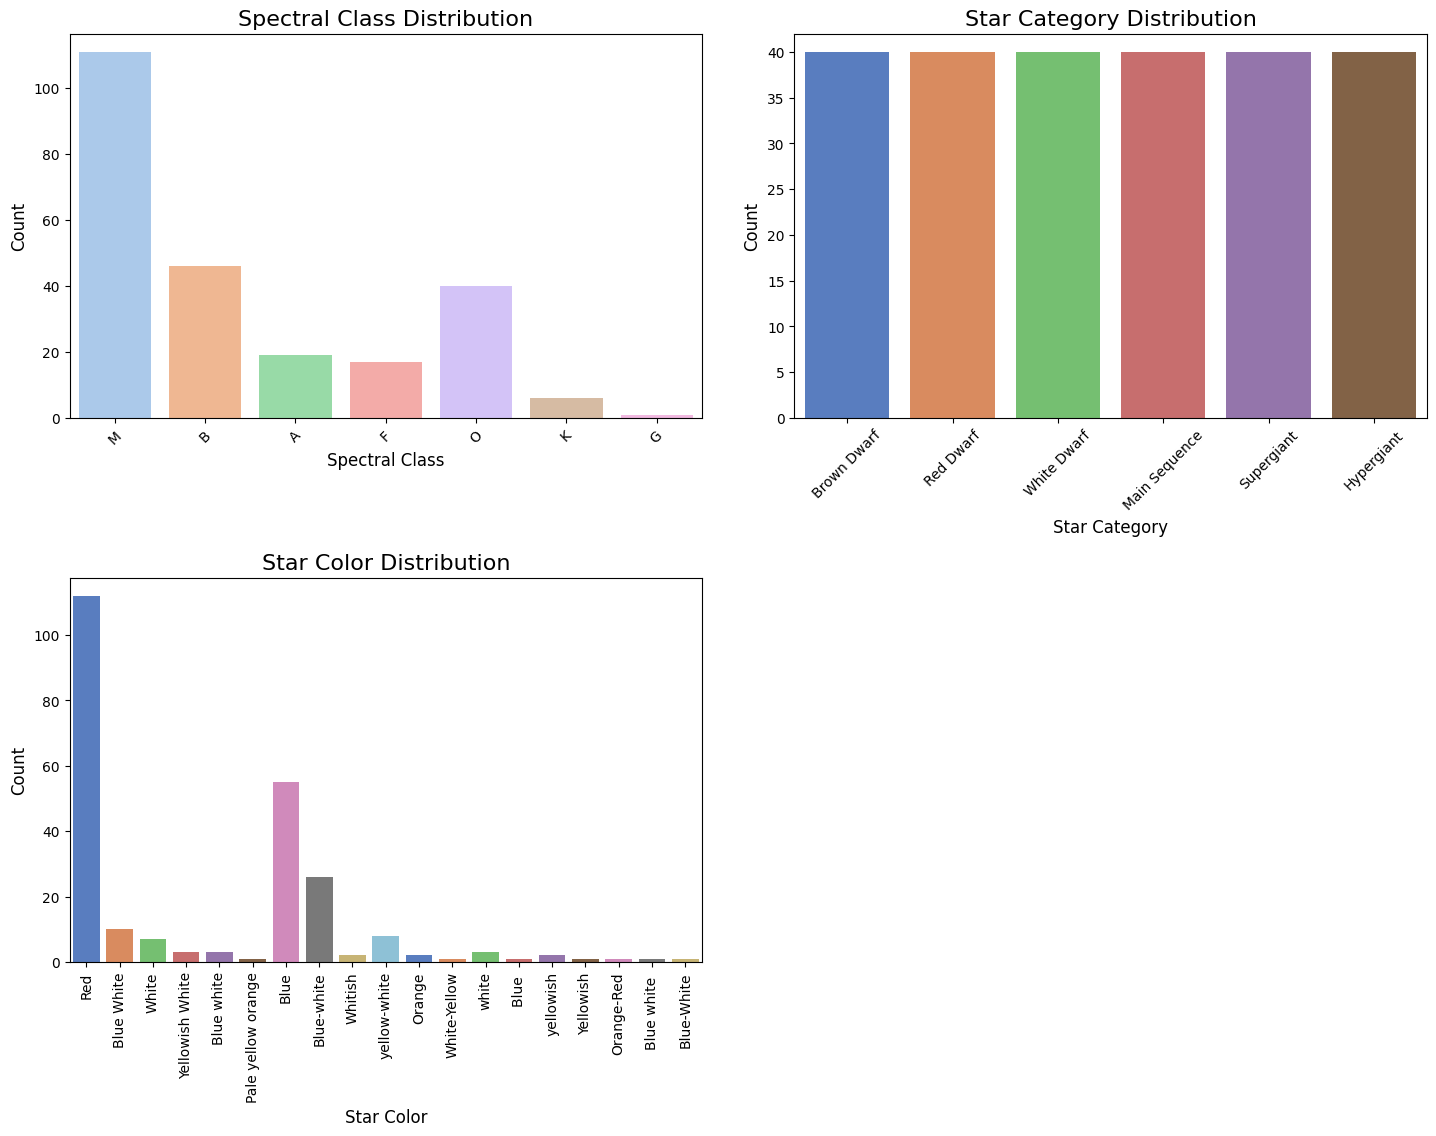

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Spectral Class distribution
sns.countplot(x="Spectral Class", data=df, ax=axes[0, 0], palette="pastel")
axes[0, 0].set_title("Spectral Class Distribution", fontsize=16)
axes[0, 0].set_xlabel("Spectral Class", fontsize=12)
axes[0, 0].set_ylabel("Count", fontsize=12)
axes[0, 0].tick_params(axis='x', labelrotation=45)

# Star category distribution
sns.countplot(x="Star category", data=df, ax=axes[0, 1], palette="muted")
axes[0, 1].set_title("Star Category Distribution", fontsize=16)
axes[0, 1].set_xlabel("Star Category", fontsize=12)
axes[0, 1].set_ylabel("Count", fontsize=12)
axes[0, 1].tick_params(axis='x', labelrotation=45)

# Star color distribution
sns.countplot(x="Star color", data=df, ax=axes[1, 0], palette="muted")
axes[1, 0].set_title("Star Color Distribution", fontsize=16)
axes[1, 0].set_xlabel("Star Color", fontsize=12)
axes[1, 0].set_ylabel("Count", fontsize=12)
axes[1, 0].tick_params(axis='x', labelrotation=90)

# Remove the fourth (unused) subplot
fig.delaxes(axes[1, 1])

plt.tight_layout(pad=3.0)
plt.show()


In [ ]:
df['Star category'].value_counts()

,count
Star category,
Brown Dwarf,40
Red Dwarf,40
White Dwarf,40
Main Sequence,40
Supergiant,40
Hypergiant,40


In [ ]:
df['Spectral Class'].value_counts()

,count
Spectral Class,
M,111
B,46
O,40
A,19
F,17
K,6
G,1


In [ ]:
df['Star color'].value_counts()

,count
Star color,
Red,112
Blue,55
Blue-white,26
Blue White,10
yellow-white,8
White,7
Blue white,3
Yellowish White,3
white,3


### Findings
#### Spectral Class Distribution:

* The plot shows the distribution of stars across different spectral classes.
* The most common spectral class is M, followed by K and G.
* The least common spectral class is O.

#### Star Category Distribution:

* The most common category is Main Sequence, followed by Red Dwarf and White Dwarf.
* The least common categories are Brown Dwarf and Hypergiant.


#### Star Color Distribution:

* This plot shows the distribution of stars based on their color.
* The most common color is White, followed by Yellow-White and Blue-White.
* The least common colors are Blue-White and Orange-Red.

## Feature Continuos exploratory analysis

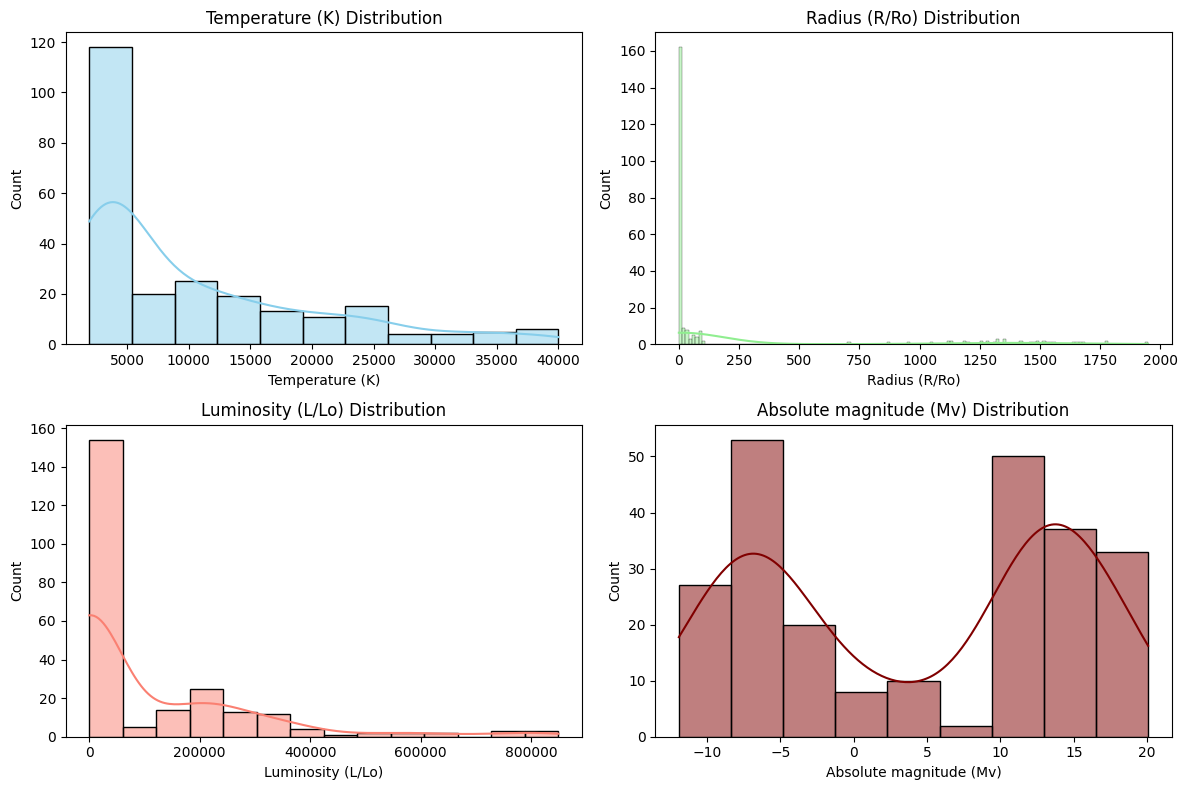

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Temperature (K) distribution
sns.histplot(df["Temperature (K)"], kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title("Temperature (K) Distribution")

# Radius (R/Ro) distribution
sns.histplot(df["Radius (R/Ro)"], kde=True, ax=axes[0, 1], color="lightgreen")
axes[0, 1].set_title("Radius (R/Ro) Distribution")

# Luminosity (L/Lo) distribution
sns.histplot(df["Luminosity (L/Lo)"], kde=True, ax=axes[1, 0], color="salmon")
axes[1, 0].set_title("Luminosity (L/Lo) Distribution")

# Absolute magnitude (Mv) distribution
sns.histplot(df["Absolute magnitude (Mv)"], kde=True, ax=axes[1, 1], color="maroon")
axes[1, 1].set_title("Absolute magnitude (Mv) Distribution")

plt.tight_layout()
plt.show()

### Findings                   
* Temperature: The distribution is skewed to the right, with a peak around 10,000 K. This indicates that a majority of stars are relatively cool.

* Radius: The distribution is also skewed to the right, with a peak around 100 Ro (solar radii). This suggests that most stars are smaller than our Sun.

* Luminosity: The distribution is again skewed to the right, with a peak around 10^4 Lo (solar luminosities). This means that most stars are less luminous than the Sun.

* Absolute magnitude: The distribution is bimodal, with peaks around -10 and 10. This suggests that there are two distinct populations of stars: those that are very bright (-10) and those that are less bright (10).

### Conclusion
The distribution of stars is characterized where by The majority of stars appear to be relatively cool, small, and dim than the sun. Interestingly, the absolute magnitude distribution exhibits two distinct peaks, possibly indicating the presence of two different types of stars

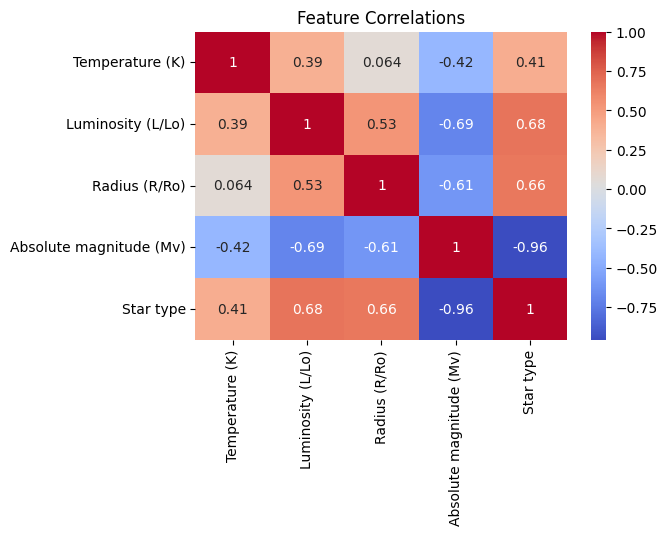

In [ ]:
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(6, 4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

### Interpretation of Correlations:

#### Positive Correlations:

* **Temperature and Luminosity**: A positive correlation means that as the temperature of a star increases, its luminosity also tends to increase.

* **Luminosity and Radius**: A positive correlation indicates that larger stars tend to be more luminous.

* **Star Type and Luminosity**: A positive correlation suggests that certain star types tend to be more luminous.

#### Negative Correlations:

* **Absolute Magnitude and Temperature**: A negative correlation means that as the temperature of a star increases, its absolute magnitude (apparent brightness) tends to decrease.

* **Absolute Magnitude and Luminosity**: A negative correlation indicates that more luminous stars tend to have lower absolute magnitudes

* **Star Type and Absolute Magnitude**: A negative correlation suggests that certain star types tend to have lower absolute magnitudes

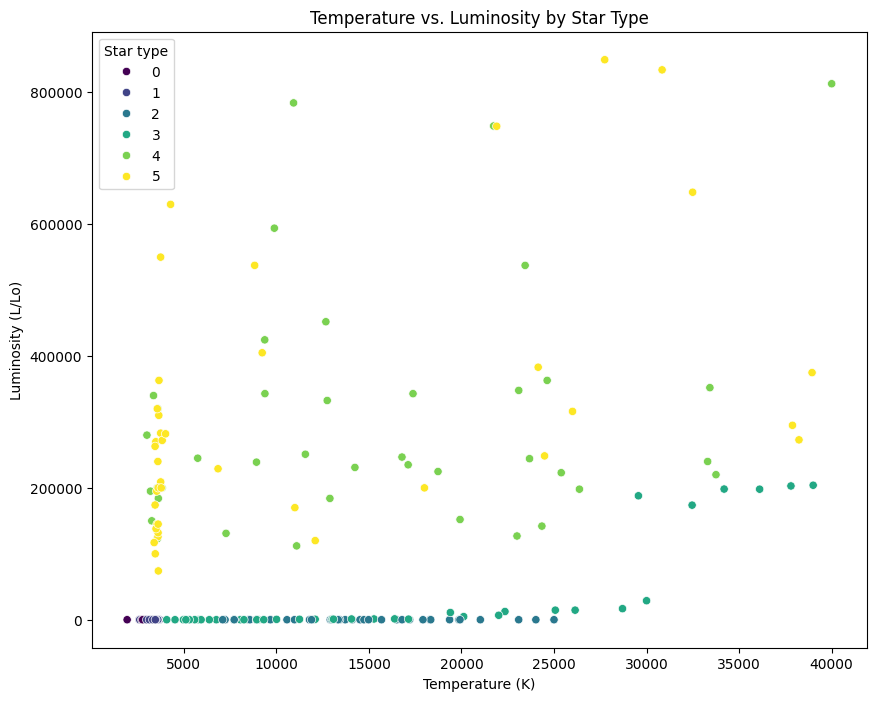

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Temperature (K)', y='Luminosity (L/Lo)', hue='Star type', palette='viridis')
plt.title('Temperature vs. Luminosity by Star Type')
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity (L/Lo)')
plt.show()

### Findings
There seems to be a general trend where stars with higher temperatures tend to have higher luminosities.

## Verification the optimal k for classification

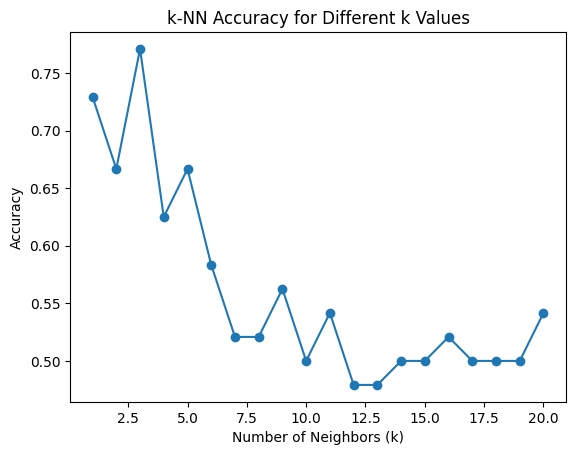

Optimal k: 3


In [ ]:
X = df[['Temperature (K)', 'Luminosity (L/Lo)']]
y = df['Star type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Determine the optimal k
accuracy_scores = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Plotting accuracy vs. k values
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k-NN Accuracy for Different k Values')
plt.show()

# Optimal k based on highest accuracy
optimal_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f'Optimal k: {optimal_k}')

## Train and Split

In [ ]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the final k-NN model using the optimal k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn_optimal.predict(X_test_scaled)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("KNN Confusion Matrix:")
print(conf_matrix)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

KNN Confusion Matrix:
[[7 1 0 0 0 0]
 [3 4 0 0 0 0]
 [0 0 6 0 0 0]
 [0 0 2 5 1 0]
 [0 0 0 0 3 5]
 [0 0 0 0 4 7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.80      0.57      0.67         7
           2       0.75      1.00      0.86         6
           3       1.00      0.62      0.77         8
           4       0.38      0.38      0.38         8
           5       0.58      0.64      0.61        11

    accuracy                           0.67        48
   macro avg       0.70      0.68      0.68        48
weighted avg       0.69      0.67      0.66        48



### k-Nearest Neighbors performance (k-NN)

* Accuracy: 67%

* Performance Summary:
  * Moderate accuracy.
  * Good performance in classifying classes 0, 2, and 3.
  * Lower recall for some classes (like 4 and 5), indicating missed instances.

In [ ]:
# Train the basic Decision Tree model
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_clf.predict(X_test)

print("Decision Tree - Basic Model")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree - Basic Model
Confusion Matrix:
 [[ 8  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  6  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



### Decision Tree - Basic Model

* Accuracy: 100%
* Performance Summary:
  * Perfect accuracy and precision for all classes, indicating that it classified every instance correctly.
  * Very high performance but may risk underfiting/overfiting due to the perfect score.

In [ ]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize a basic Decision Tree model
dt_clf = DecisionTreeClassifier(random_state=42)

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters from Grid Search
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Train the Decision Tree model with the best hyperparameters
best_dt_clf = grid_search.best_estimator_
best_dt_clf.fit(X_train, y_train)

# Predictions
y_pred_dt = best_dt_clf.predict(X_test)

# Evaluation
print("Decision Tree - Tuned Model")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
Decision Tree - Tuned Model
Confusion Matrix:
 [[8 0 0 0 0 0]
 [0 7 0 0 0 0]
 [0 0 6 0 0 0]
 [0 0 0 8 0 0]
 [0 0 0 0 5 3]
 [0 0 0 0 3 8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       0.62      0.62      0.62         8
           5       0.73      0.73      0.73        11

    accuracy                           0.88        48
   macro avg       0.89      0.89      0.89        48
weighted avg       0.88      0.88      0.88        48



### Decision Tree - Tuned Model

* Accuracy: 88%
* Performance Summary:
  * Strong accuracy, second only to the basic Decision Tree model.
  * High precision and recall across most classes, though slightly lower in class 4.
  * Likely a more generalizable option than the basic Decision Tree, with less overfitting/underfiting risk.

In [ ]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model on the scaled data
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_svm = svm_clf.predict(X_test_scaled)

# Evaluate the model
print("SVM - Basic Model")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

SVM - Basic Model
Confusion Matrix:
 [[0 8 0 0 0 0]
 [0 7 0 0 0 0]
 [0 0 6 0 0 0]
 [0 3 2 2 1 0]
 [0 0 0 0 4 4]
 [0 0 0 0 3 8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.39      1.00      0.56         7
           2       0.75      1.00      0.86         6
           3       1.00      0.25      0.40         8
           4       0.50      0.50      0.50         8
           5       0.67      0.73      0.70        11

    accuracy                           0.56        48
   macro avg       0.55      0.58      0.50        48
weighted avg       0.55      0.56      0.50        48



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### SVM - Basic Model

* Accuracy: 56%
* Performance Summary:
  * Lower accuracy compared to other models.
  * Perfect recall for class 1 but poor performance on class 0.
  * Generally weaker classification performance, suggesting this model may need tuning.

In [ ]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],          # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']  # Types of kernel
}

# Initialize an SVM model
svm_clf = SVC(random_state=42)

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters from Grid Search
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Train the SVM model with the best hyperparameters
best_svm_clf = grid_search.best_estimator_
best_svm_clf.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_svm = best_svm_clf.predict(X_test_scaled)

# Evaluation
print("SVM - Tuned Model")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

Best hyperparameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
SVM - Tuned Model
Confusion Matrix:
 [[6 2 0 0 0 0]
 [3 4 0 0 0 0]
 [0 0 6 0 0 0]
 [0 0 2 5 1 0]
 [0 0 0 0 4 4]
 [0 0 0 0 3 8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.67      0.57      0.62         7
           2       0.75      1.00      0.86         6
           3       1.00      0.62      0.77         8
           4       0.50      0.50      0.50         8
           5       0.67      0.73      0.70        11

    accuracy                           0.69        48
   macro avg       0.71      0.70      0.69        48
weighted avg       0.70      0.69      0.69        48



### SVM - Tuned Model

* Accuracy: 69%
* Performance Summary:
  * Improved accuracy over the basic SVM model.
  * Balanced precision and recall across classes, with high recall for class 2.
  * Moderate overall performance, though not as strong as the Decision Tree models.

## Evaluatiuon of the different models
Having created the different algrorithms this is what we have established:

* The best performing model is the basic Decision Tree, which achieved perfect scores. However, there are concerns about potential overfitting/underfitting.

* The second-best option is the tuned Decision Tree model, which had an impressive 88% accuracy, providing a balance of high performance and better generalization.

* Between the SVM tuned model and the k-NN model, the SVM tuned model performed slightly better in terms of accuracy and macro averages.

Overall, the Decision Tree models, especially the tuned version, appear to be the most effective options, offering high accuracy while potentially avoiding the overfitting issues of the basic Decision Tree model.

# Further follow up of using another target variable

### Used (Star category) as the new Target Variable

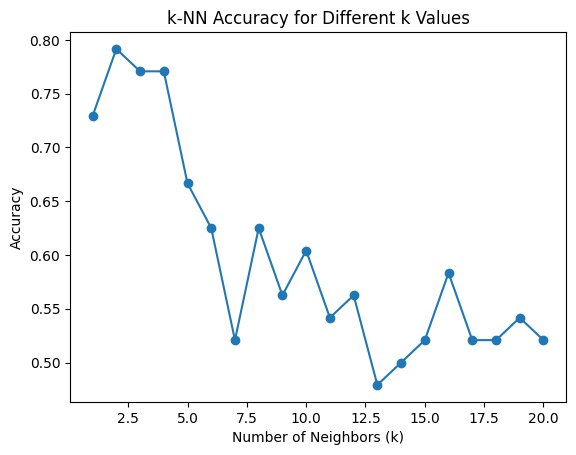

Optimal k: 2


In [4]:
X = df[['Temperature (K)', 'Luminosity (L/Lo)']]
y = df['Star category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Determine the optimal k
accuracy_scores = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Plotting accuracy vs. k values
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k-NN Accuracy for Different k Values')
plt.show()

# Optimal k based on highest accuracy
optimal_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f'Optimal k: {optimal_k}')

In [5]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the final k-NN model using the optimal k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn_optimal.predict(X_test_scaled)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("KNN Confusion Matrix:")
print(conf_matrix)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

KNN Confusion Matrix:
[[ 8  0  0  0  0  0]
 [ 0 10  0  0  1  0]
 [ 0  0  7  0  0  1]
 [ 5  0  0  2  0  0]
 [ 0  5  0  0  3  0]
 [ 0  0  4  0  0  2]]

Classification Report:
               precision    recall  f1-score   support

  Brown Dwarf       0.62      1.00      0.76         8
   Hypergiant       0.67      0.91      0.77        11
Main Sequence       0.64      0.88      0.74         8
    Red Dwarf       1.00      0.29      0.44         7
   Supergiant       0.75      0.38      0.50         8
  White Dwarf       0.67      0.33      0.44         6

     accuracy                           0.67        48
    macro avg       0.72      0.63      0.61        48
 weighted avg       0.72      0.67      0.63        48



### k-NN Model Performance:

* The k-NN model achieves a reasonable overall accuracy of 67%.
* It shows strong classification capability for the Brown Dwarfs and Hypergiants classes.
* However, the model struggles with classes like Red Dwarf and White Dwarf, where the recall is low.
* This suggests the k-NN model sometimes fails to capture all instances of these classes, likely due to similarities with other classes.

In [6]:
# Train the basic Decision Tree model
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_clf.predict(X_test)

print("Decision Tree - Basic Model")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree - Basic Model
Confusion Matrix:
 [[7 0 0 1 0 0]
 [0 8 0 0 3 0]
 [0 0 7 0 1 0]
 [0 0 0 7 0 0]
 [0 4 0 0 4 0]
 [0 0 0 0 0 6]]

Classification Report:
                precision    recall  f1-score   support

  Brown Dwarf       1.00      0.88      0.93         8
   Hypergiant       0.67      0.73      0.70        11
Main Sequence       1.00      0.88      0.93         8
    Red Dwarf       0.88      1.00      0.93         7
   Supergiant       0.50      0.50      0.50         8
  White Dwarf       1.00      1.00      1.00         6

     accuracy                           0.81        48
    macro avg       0.84      0.83      0.83        48
 weighted avg       0.82      0.81      0.81        48



###  Decision Tree Model Performance:

* The Decision Tree model achieves a good overall accuracy of 81%.
* It performs very well in classifying certain star types, such as Brown Dwarfs, Main Sequence, Red Dwarfs, and White Dwarfs, with high precision and recall.
* The model struggles a bit with the Hypergiant and Supergiant categories, with some misclassification

In [7]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize a basic Decision Tree model
dt_clf = DecisionTreeClassifier(random_state=42)

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters from Grid Search
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Train the Decision Tree model with the best hyperparameters
best_dt_clf = grid_search.best_estimator_
best_dt_clf.fit(X_train, y_train)

# Predictions
y_pred_dt = best_dt_clf.predict(X_test)

# Evaluation
print("Decision Tree - Tuned Model")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree - Tuned Model
Confusion Matrix:
 [[8 0 0 0 0 0]
 [0 7 0 0 4 0]
 [0 1 7 0 0 0]
 [1 0 0 6 0 0]
 [0 4 0 0 4 0]
 [0 0 0 0 0 6]]

Classification Report:
                precision    recall  f1-score   support

  Brown Dwarf       0.89      1.00      0.94         8
   Hypergiant       0.58      0.64      0.61        11
Main Sequence       1.00      0.88      0.93         8
    Red Dwarf       1.00      0.86      0.92         7
   Supergiant       0.50      0.50      0.50         8
  White Dwarf       1.00      1.00      1.00         6

     accuracy                           0.79        48
    macro avg       0.83      0.81      0.82        48
 weighted avg       0.80      0.79      0.79        48



### Tuned Decision Tree Model Performance:

* The tuned Decision Tree model achieves an accuracy of 79%.
* It performs well for classes like Brown Dwarf, Main Sequence, Red Dwarf, and White Dwarf, with high precision and recall.
* The model shows moderate performance for the Hypergiant and Supergiant classes, indicating some remaining misclassifications even after tuning.
* Overall, the tuned Decision Tree model demonstrates balanced performance, with improved handling of certain star classes compared to the base model.

In [8]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model on the scaled data
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_svm = svm_clf.predict(X_test_scaled)

# Evaluate the model
print("SVM - Basic Model")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

SVM - Basic Model
Confusion Matrix:
 [[0 0 0 8 0 0]
 [0 8 0 0 3 0]
 [0 0 2 3 1 2]
 [0 0 0 7 0 0]
 [0 4 0 0 4 0]
 [0 0 0 0 0 6]]

Classification Report:
                precision    recall  f1-score   support

  Brown Dwarf       0.00      0.00      0.00         8
   Hypergiant       0.67      0.73      0.70        11
Main Sequence       1.00      0.25      0.40         8
    Red Dwarf       0.39      1.00      0.56         7
   Supergiant       0.50      0.50      0.50         8
  White Dwarf       0.75      1.00      0.86         6

     accuracy                           0.56        48
    macro avg       0.55      0.58      0.50        48
 weighted avg       0.55      0.56      0.50        48



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### SVM - Basic Model Performance:

* The SVM - Basic Model achieved a relatively low overall accuracy of 56%.
* The model struggles significantly with the Brown Dwarf and Main Sequence classes, with most instances misclassified into other categories.
* The Red Dwarf and White Dwarf classes show good performance, achieving perfect recall.

In [9]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],          # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']  # Types of kernel
}

# Initialize an SVM model
svm_clf = SVC(random_state=42)

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters from Grid Search
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Train the SVM model with the best hyperparameters
best_svm_clf = grid_search.best_estimator_
best_svm_clf.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_svm = best_svm_clf.predict(X_test_scaled)

# Evaluation
print("SVM - Tuned Model")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

Best hyperparameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
SVM - Tuned Model
Confusion Matrix:
 [[6 0 0 2 0 0]
 [0 8 0 0 3 0]
 [0 0 5 0 1 2]
 [3 0 0 4 0 0]
 [0 4 0 0 4 0]
 [0 0 0 0 0 6]]

Classification Report:
                precision    recall  f1-score   support

  Brown Dwarf       0.67      0.75      0.71         8
   Hypergiant       0.67      0.73      0.70        11
Main Sequence       1.00      0.62      0.77         8
    Red Dwarf       0.67      0.57      0.62         7
   Supergiant       0.50      0.50      0.50         8
  White Dwarf       0.75      1.00      0.86         6

     accuracy                           0.69        48
    macro avg       0.71      0.70      0.69        48
 weighted avg       0.70      0.69      0.69        48



###  SVM - Tuned Model Performance:

* The SVM - Tuned Model achieved an overall accuracy of 69%, an improvement over the SVM - Basic Model.
* The tuning process helped increase the performance for challenging classes like Brown Dwarf and Main Sequence.
* The White Dwarf class continues to have perfect recall.
* While the Supergiant and Red Dwarf classes still show moderate performance, the tuned model provides a more balanced performance across all classes.
* The SVM - Tuned Model is a stronger option compared to the untuned SVM model, thanks to the improvements made through the tuning process.


## Evaluation of the Different Models (Star category as the target variable)

After evaluating the performance of the different models, we have established the following:

* The best performing model is the basic Decision Tree, which achieved an impressive accuracy of 81%. It performed particularly well across most classes, but there are concerns about potential overfitting/underfitting.

* The second-best option is the tuned Decision Tree model, with an accuracy of 79%. While slightly lower than the basic model, it offered improved performance in handling more classes, making it a more balanced and generalized choice.

* Between the SVM - Tuned Model (69% accuracy) and the KNN - Tuned Model (67% accuracy), the SVM tuned model performed slightly better, showing better balance across various classes, particularly in the Main Sequence and White Dwarf categories.

Overall, the Decision Tree models, especially the basic model, offer the highest accuracy and performance, but the tuned Decision Tree might be preferred due to its better generalization and slightly reduced risk of overfitting.